<a href="https://colab.research.google.com/github/boginni/DeepLearning-Dog-heatmap/blob/main/Cat_%26_Dog_Heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob


In [1]:
!wget https://www.dropbox.com/s/alw4wehyx8gxb1j/dogs-vs-cats.zip?dl=0
!unzip /content/dogs-vs-cats.zip?dl=0

!unzip /content/train.zip
!unzip /content/test1.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: test1/5499.jpg          
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg   

In [2]:
TRAIN_DIR = "./DATASET"

ORG_DIR = "/content/train"

CLASS = ['cat','dog']

In [4]:
for C in CLASS:
  DEST = os.path.join(TRAIN_DIR, C)

  if not os.path.exists(DEST):
    os.makedirs(DEST)
  
  for img_path in glob.glob(os.path.join(ORG_DIR, C) + "*"):
    SRC = img_path

    shutil.copy(SRC, DEST)



Model Building

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow as tf
import keras
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator , load_img, img_to_array


In [34]:
base_model = InceptionV3(input_shape=(256, 256, 3), include_top=False)

In [7]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
X = Flatten()(base_model.output)
X = Dense(units=2, activation='sigmoid')(X)

model = Model(base_model.input, X)

model.compile(optimizer= 'adam', loss = keras.losses.binary_crossentropy, metrics=['accuracy'])

model.summary()



Pre Process data

In [9]:
train_datagen = ImageDataGenerator(featurewise_center=True ,
                                   rotation_range=0.4, 
                                   width_shift_range=0.3, 
                                   horizontal_flip=True,
                                   preprocessing_function= preprocess_input, 
                                   zoom_range= 0.4, 
                                   shear_range = 0.4)

train_data = train_datagen.flow_from_directory(directory = "/content/DATASET", 
                                               target_size=(256, 256), 
                                               batch_size = 36)


Found 25000 images belonging to 2 classes.


VIZUALIZING DATA

In [10]:
train_data.class_indices

{'cat': 0, 'dog': 1}

In [11]:
t_img, label = train_data.next()

In [12]:
def plotImages(img_arr, label):
  """
  input : image_array
  output: plot images
  """

  for idx, img in enumerate(img_arr) :

    if idx <= 10 :

      plt.figure(figsize = (5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis = False
      plt.show()






Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


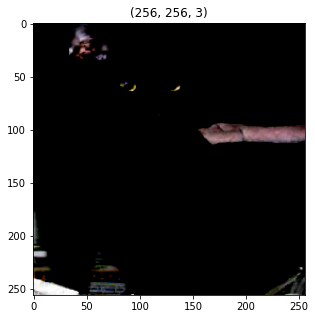

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


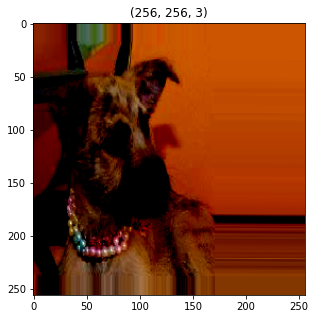

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


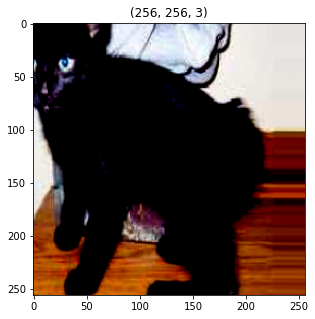

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


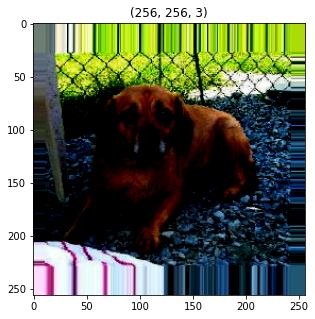

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


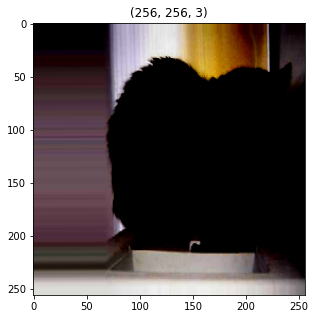

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


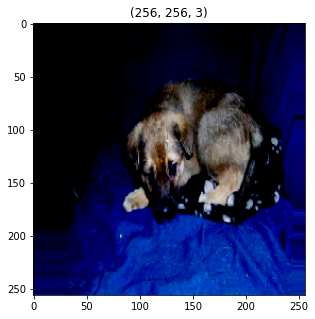

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


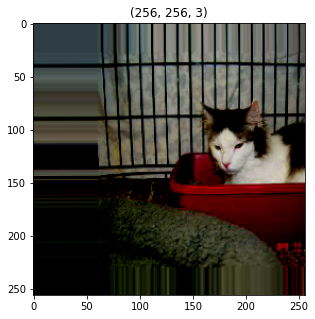

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


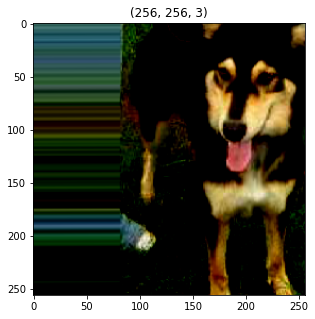

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


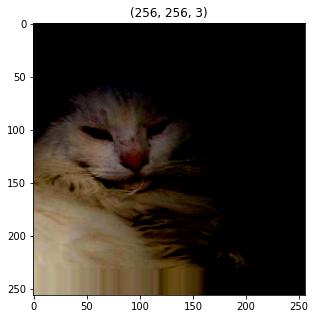

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


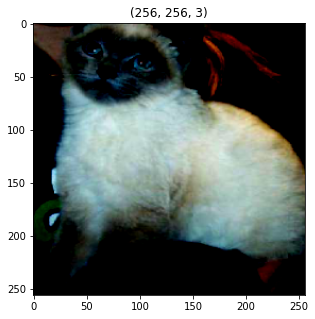

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


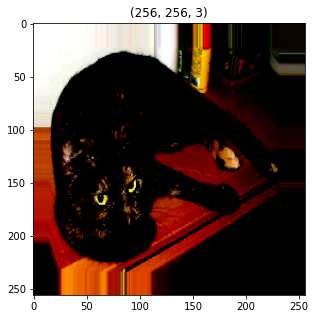

In [13]:
plotImages(t_img, label)

MODEL CHECK POINT

In [14]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

mc  = ModelCheckpoint(filepath = "./best_model.h5",
                      monitor="accuracy",
                      verbose=1,
                      save_best_only = True)

es = EarlyStopping(monitor = "accuracy", 
                   min_delta= 0.01, 
                   patience = 5, 
                   verbose = 1)

cb = [mc, es]

In [15]:
his = model.fit_generator(train_data, 
                          steps_per_epoch=10, 
                          epochs = 30,
                          callbacks = cb)

Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 1.2782 - accuracy: 0.8611
Epoch 00001: accuracy improved from -inf to 0.86111, saving model to ./best_model.h5
10/10 [==============================] - 23s 767ms/step - loss: 1.2782 - accuracy: 0.8611
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 0.2015 - accuracy: 0.9833
Epoch 00002: accuracy improved from 0.86111 to 0.98333, saving model to ./best_model.h5
10/10 [==============================] - 8s 810ms/step - loss: 0.2015 - accuracy: 0.9833
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 0.2048 - accuracy: 0.9778
Epoch 00003: accuracy did not improve from 0.98333
10/10 [==============================] - 7s 690ms/step - loss: 0.2048 - accuracy: 0.9778
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 0.1012 - accuracy: 0.9861
Epoch 00004: accuracy improved from 0.98333 to 0.98611, saving model to ./best_model.h5
10/10 [==============================] - 8s 

In [16]:
from keras.models import load_model

model = load_model("/content/best_model.h5")

In [17]:
h = his.history
h.keys()


dict_keys(['loss', 'accuracy'])

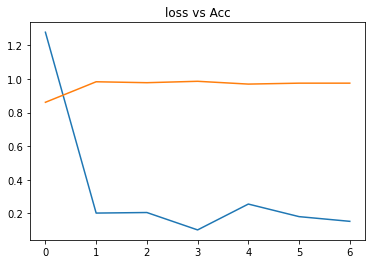

In [18]:
plt.plot(h['loss'])
plt.plot(h['accuracy'])

plt.title("loss vs Acc")
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1
the image is of dog


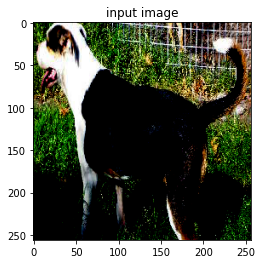

In [80]:
path = "/content/test1/10003.jpg"
img = load_img(path, target_size=(256, 256) )

i = img_to_array(img)

i = preprocess_input(i)

input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(pred)

if pred == 0:
  print("The image is of cat")
else:
  print("the image is of dog")

plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = False
plt.show()



GRAD-CAM

In [85]:
def get_img_array(img_path):

  img = load_img(img_path, target_size=(256, 256) )

  img = img_to_array(img)
  img = preprocess_input(img)

  input_arr = np.array([img])

  return input_arr

In [21]:
import tensorflow as tf


GRADCAM

In [103]:
def make_gradcamheatmap(img_arr, model, last_conv_layer_name, pred_index = None):
  
  grad_model = tf.keras.models.Model(
      [model.input], [model.get_layer(last_conv_layer_name).output, model.output]
  )

  with tf.GradientTape() as tape:
    last_conv_layer_output, preds = grad_model(img_arr)

    if pred_index is None: 
      pred_index = tf.argmax(preds[0])
    
    class_channel = preds[:,pred_index]

  grads = tape.gradient(class_channel, last_conv_layer_output)

  pooled_grads = tf.reduce_mean(grads, axis=(0,1,2))

  last_conv_layer_output = last_conv_layer_output[0]

  heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]

  heatmap = tf.squeeze(heatmap)

  heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)

  return heatmap.numpy()



In [23]:
import matplotlib.cm as cm

from IPython.display import Image, display

In [24]:
def save_and_display_gradcam(img_path, heatmap, cam_path = "cam.jpg", alpha = 0.4):
  img = img_to_array(load_img(img_path) )

  heatmap = np.uint8(255 * heatmap)

  jet = cm.get_cmap("jet")

  jet_colors = jet(np.arange(256))[:,:3]
  jet_heatmap = jet_colors[heatmap]

  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  superimposed_img = jet_heatmap * alpha + img
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)


  superimposed_img.save(cam_path)

  display(Image(cam_path))





In [107]:
def image_prediction_and_visualization(path, last_conv_layer_name = "conv2d_93", model = model):


  img_array = get_img_array(path)

  heatmap = make_gradcamheatmap(img_array, model, last_conv_layer_name)

  plt.title("the heat map of the image is ")
  plt.imshow(heatmap)
  plt.show()

  pred = np.argmax(model.predict(img_array))
  print()
  print()
  print()

  if pred == 0:
    print("The image is of a Cat")
  else:
    print("The image is of a Dog")

  print()

  save_and_display_gradcam(path, heatmap)

  print()
  print("the original input image")
  print()

  a = plt.imread(path)
  plt.imshow(a, cmap = "gray")
  plt.title("Original image")
  plt.show()
  



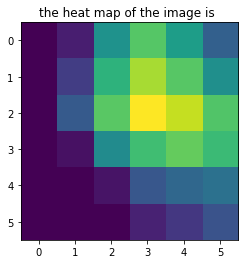




The image is of a Cat



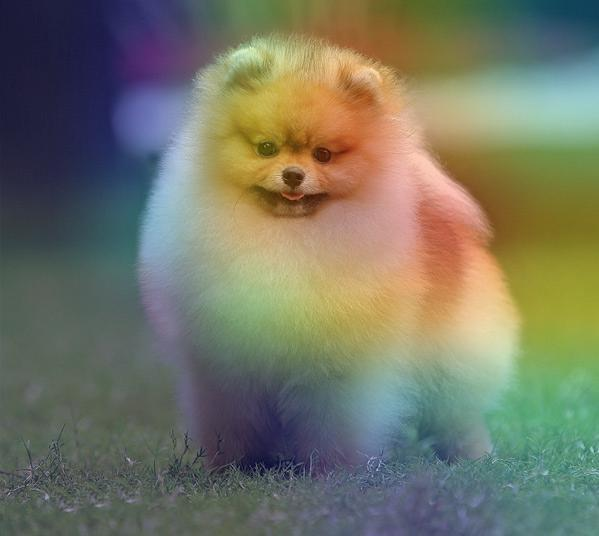


the original input image



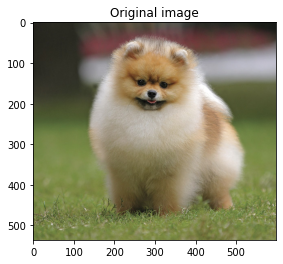

In [123]:
path = "/content/buying-a-dog.jpg"
image_prediction_and_visualization(path)


